In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('amazon_alexa.tsv', sep = '\t')
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.drop(columns=['date'],inplace=True)
df.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   variation         3150 non-null   object
 2   verified_reviews  3150 non-null   object
 3   feedback          3150 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 98.6+ KB


In [6]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
df.isnull().sum()

rating              0
variation           0
verified_reviews    0
feedback            0
dtype: int64

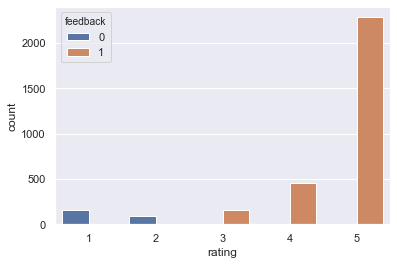

In [8]:
sns.set()
sns.countplot(x='rating',data=df,hue='feedback')

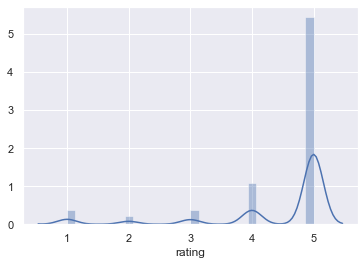

In [9]:
sns.distplot(df['rating'])

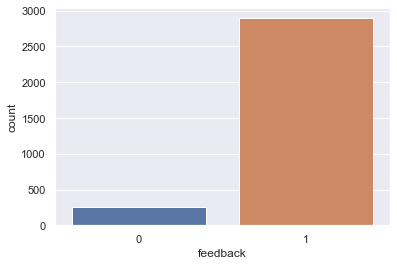

In [10]:
sns.countplot(x='feedback',data=df)

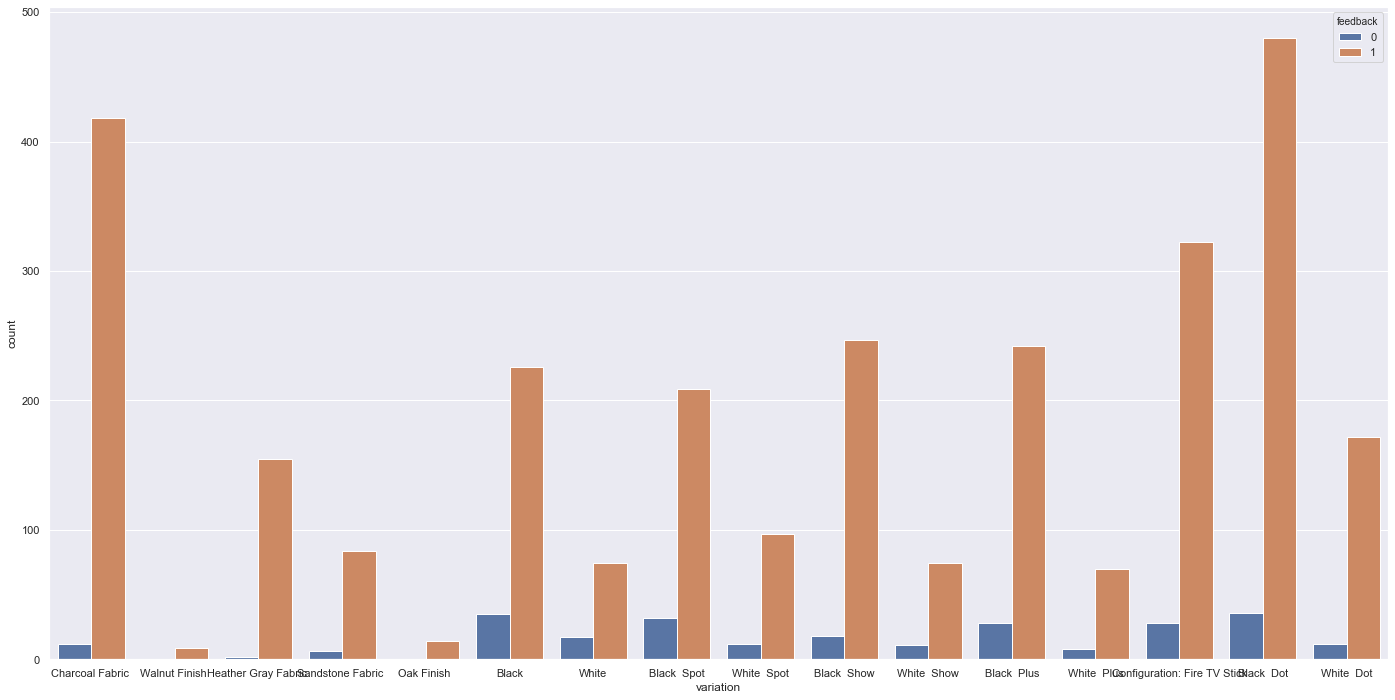

In [11]:
plt.figure(figsize=(24,12))
sns.countplot(x='variation',hue='feedback',data=df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   variation         3150 non-null   object
 2   verified_reviews  3150 non-null   object
 3   feedback          3150 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 98.6+ KB


In [13]:
df.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


In [14]:
from sklearn.preprocessing import LabelEncoder

df['variation'] = LabelEncoder().fit_transform(df['variation'].values)

In [15]:
df.head()

,rating,variation,verified_reviews,feedback
0,5,5,Love my Echo!,1
1,5,5,Loved it!,1
2,4,10,"Sometimes while playing a game, you can answer...",1
3,5,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,5,Music,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   variation         3150 non-null   int32 
 2   verified_reviews  3150 non-null   object
 3   feedback          3150 non-null   int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 86.3+ KB


In [17]:
text = df['verified_reviews']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
text_counts = CountVectorizer().fit_transform(text.values)

from sklearn.feature_extraction.text import TfidfTransformer
text_tf = TfidfTransformer(use_idf = False).fit_transform(text_counts)

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(['feedback', 'verified_reviews'], axis = 1) 
y = df['feedback']

X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size = 0.3)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model = model.fit(X_train, y_train)

prediction = model.predict(X_test)
accuracy_score(prediction, y_test)

1.0

In [21]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel = model.fit(X_train,y_train)

prediction = model.predict(X_test)
accuracy_score(y_test,prediction)

1.0

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
accuracy_score(y_test, dt_pred)

1.0